----
word2vec
===

<img src="images/book.png" style="width: 400px;"/>

---
Pop Quiz
---

<details><summary>
Do computers prefer numbers or strings?
</summary>
Numbers. word2vec is currently the best way to convert strings to numbers.
</details>

---
By The End Of This Session You Should Be Able To:
---

- Explain why word2vec is powerful and popular
- Describe how word2vec is a neural network
- Indentify the common architectures of word2vec
- Apply word2vec to dataset

---
Story time...
---

In [4]:
corpus = """The man and woman meet each other ...
         They become king and queen ...
         They got old and stop talking to each other. Instead, they read books and magazines ...
         """

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [7]:
# Let's hand assign the words to vectors
words = ['queen', 'book', 'king', 'magazine', 'woman', 'man']

vectors = np.array([[0.1,   0.3],  # queen
                    [-0.5, -0.1],  # book
                    [0.2,   0.2],  # king
                    [-0.3, -0.2],  # magazine
                    [-0.5,  0.4],  # car
                    [-0.45, 0.3]]) # bike

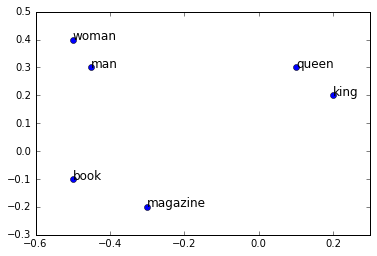

In [8]:
plt.plot(vectors[:,0], vectors[:,1], 'o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.3, 0.5)
for word, x, y in zip(words, vectors[:,0], vectors[:,1]):
    plt.annotate(word, (x, y), size=12)

---
Check for understanding
---

<details><summary>
How many dimensions are data represented in? How many dimensions would we need to represent for typical word vectors?
</summary>
There are 2 dimensions. Typicall word vectors would need 5 (n-1). You would could a baseline words as all zeros.
</details>

----
word2vec creates dense representations
----

![](images/dense_repsentations.png)

---
Distributional Hypothesis
---


![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/John_Rupert_Firth.png/220px-John_Rupert_Firth.png)

>“You shall know a word
>by the company it keeps”

> \- J. R. Firth 1957

---
Example
---

> ... government debt problems are turning into __banking__ crises...  

> ... Europe governments needs unified __banking__ regulation to replace the hodgepodge of debt regulations...

These words (e.g., government, regulation) will represent __banking__

----
How does word2vec model the Distributional Hypothesis?
---

Input = text corpus  
Output = vector for each word

Word2Vec is a very simple neural network with a single hidden layer. 
![](images/w2v_neural_net.png)

Note: The bow-tie shape. That is is an __autoencoder__. Autoencoders compress sparse representations into dense representation. The neural network learns the mapping that best preserves the structure of the orginal space.

---
Neural Net Sidebar
----

![](https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg)

### By The End of This Sidebar You should be able to:
1. Identify the components of a neural net.
2. Explain how neural represent data.
3. Understand how backprogragation algorithm enables the updates of wieghts.

## Demystifying neural networks
  
![](images/single_neuron.png)  

Neural nets take many inputs, aggregate the singals, and produces an output.

[See Appendix of _word2vec Parameter Learning Explained_ for complete review of neural nets](http://arxiv.org/abs/1411.2738)

![](images/neuron_math.png)

y = f(u)

where u is a scalar number, which is the net input (or “new input”) of the neuron. u is
defined as

![](images/input.png)
x is a vector of inputs  
w is a vector of weights  

**Note:** Ingoring bias term, add an input add an input dimension (e.g., x0) that is constant 1.
u = b + sum(x *w)
where b is basis

---
Logistic function
----

f(u) where f is activation function/decision/transfer function.  
f(u) is the logistic function, – the most common sigmoid non-linearity. (it should look famailar)

![](images/logistic_function.png)

![](images/logistic_function_graph.png)

Neural Nets are like logistic regression.

Good properties:
- the output y is always between 0 and 1, 
- σ(u) is smooth and differentiable, making the derivation of update equation very easy.




---
Updating the weights
----

![](images/basic_neural_net.png)

1. Intial random weights.  
2. Calculate loss function.  
3. Update weights via back propgation.

---
Check for understanding
---

<details><summary>
What is a loss function? Give a couple of examples.
</summary>
A lost function is how you weigh your errors.

For example, sum of squared residuals heavily penalizes large misses. While hinge loss ignores some errors all together.
</details>

----
Gradient descent: The secret sauce of neural networks
---

Define the error function, i.e., the training objective.

Objective function:
![](images/objective_function.png)


Apply gradient descent:
![](images/stochastic_gradient_descent.png)

NOTE: This is technically stochastic gradient descent. It is a minor variation that is much more pratical and used more often in pratice.

---
How does this look during training?
---



In [9]:
from IPython.display import display, VimeoVideo

display(VimeoVideo(112168934))

---
The 2 architectures of word2vec
----

1. “Continuous bag of words”: Predict a missing word in a sentence based on the surrounding context

2. “Skip-gram”: Each current word as an input to a log-linear classifier to predict words within a certain range before and after that current word

## Continuous bag of words (CBOW) architecture

<img src="images/cbow.png" style="width: 400px;"/>
Given the context (surronding words), predict the current word.

[Detailed explanation](http://alexminnaar.com/word2vec-tutorial-part-ii-the-continuous-bag-of-words-model.html)



## Skip-gram architecture (the inverse of CBOW)

<img src="images/skip-gram.png" style="width: 400px;"/>
Given the current word, predict the context (surrounding words).

---
Defining skip-grams
---

![](images/skip-gram-equation.png)

k-skip-n-grams for a sentence w1... wm to be the set

Skip-grams reported for a certain skip distance k allow a total of k or less skips to construct the n-gram. As such, “4-skip-n-gram” results include 4 skips, 3 skips, 2 skips, 1 skip, and 0 skips (typical n-grams formed from adjacent words).

---
Skip-gram example
---

Here is an actual sentence example showing 2-skip-bi-grams and tri-grams compared to standard bi-grams and trigrams consisting of adjacent words for the sentence:

>“Insurgents killed in ongoing fighting.”

Bi-grams = {insurgents killed, killed in, in ongoing, ongoing fighting}.  

2-skip-bi-grams = {insurgents killed, insurgents in, insurgents ongoing, killed in, killed ongoing, killed fighting, in ongoing, in fighting, ongoing fighting}.  

Tri-grams = {insurgents killed in, killed in ongoing, in ongoing fighting}.  

2-skip-tri-grams = {insurgents killed in, insurgents killed ongoing, insurgents killed fighting, insurgents in ongoing, insurgents in fighting, insurgents ongoing fighting, killed in ongoing, killed in fighting, killed ongoing fighting, in ongoing fighting}. 


## Skip-Gram architecture, deep dive

![](images/skip_gram_detailed.png)

The target word is now at the input layer, and the context words are on the output layer.

On the output layer, instead of outputing one multinomial distribution, we are outputing C multinomial distributions. Each output is computed using the same hidden to output matrix

Objective function:
![](images/multinomial_distributions.png)

Because the output layer panels share the same weights,

Loss function:
![](images/skip_gram_loss.png)

## CBOW vs. Skip-gram
CBOW is several times faster to train than the skip-gram and has slightly better accuracy for the frequent words.  

Skip-gram works well with small amount of the training data and well represents rare words.

Skip-gram tends to be the most commmon architecture.

----
Now that we have word vectors, what can we do? Math with words!
----

---
Distance
---

![](http://blog.krecan.net/wp-content/family.png)

The word vectors are directions in space and can encode relationships between words.  

The proximity of words to each other can be calculated through their cosine similarity.

![cosine_sim](https://upload.wikimedia.org/math/f/3/6/f369863aa2814d6e283f859986a1574d.png)

1 meaning exactly the same  
0 indicating orthogonality (decorrelation)  
−1 meaning exactly opposite  

In [15]:
def cos_sim(v1, v2):
   "Calculate cosine similarity between vector 1 and 2"
   return v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))



tests pass :)


In [ ]:
def test_cos_sim():
    v1 = np.array([1, 2, 3])
    v2 = np.array([-1, -2, -3])
    v3 = np.array([0, 3])
    v4 = np.array([4, 0])
    v5 = np.array([3, 45, 7, 2])
    v6 = np.array([2, 54, 13, 15])
    assert cos_sim(v1, v1) == 1.0
    assert cos_sim(v1, v2) == -1.0
    assert cos_sim(v3, v4) == 0.0
    assert round(cos_sim(v5, v6), 4) == round(0.97228425171235, 4)
    return "tests pass :)"
    
print(test_cos_sim())

<br>
<br>
<br>
----

Words closest to “Sweden”
![](http://deeplearning4j.org/img/sweden_cosine_distance.png)

---
Extention to analogies, aka linear relationships
---

### Male-Female
![](http://multithreaded.stitchfix.com/assets/images/blog/vectors.gif)

[Demo](http://rare-technologies.com/word2vec-tutorial/#app)

### Plurals

![](images/plurals.png)  

Different paths through word2vec space encode different relationships. More on this next time with doc2vec

### Verb Tense

![](images/verb.png)

### Country-Captial
![](images/country.png)

----
Use word2vec to build data products
----

When I worked at an employment website, I built a recommendation engine for job seekers.  
<br>
<details><summary>
What improved job would you recommend to a Babysitter?
</summary>
A Nanny. 
<br>
A Nanny is a Babysitter as Senior Engineer is to a Engineer.
</details>

---
Word2vec implemenation
---

### Code
[Google’s word2vec](https://code.google.com/p/word2vec/)  

__Hightlights__:

- Written in C
- Highly optimitized
- Light on documentation and transparency 

[Python’s Gensim package](https://radimrehurek.com/gensim/)  
[Google’s TensorFlow](https://www.tensorflow.org/versions/r0.8/tutorials/word2vec/index.html)

### Corpus
> "Data is the world's best regularizer"

---
Check for understanding
---

<details><summary>
How do we evaluate word2vec, especially if it is built on a custom corpus?
</summary>
Word2Vec is an unsupervised learning algorithm. Thus there’s no good way to objectively evaluate the result. 

One possible method is to compare analogies performance with pretrained Google vectors.
</details>

---
Summary
---

- Word2Vec is popular because it is easy to implement and creates a useful abstraction of embeddeding words in a high (but tractable) dimensional space.
- Word2Vec is a _relatively_ simple neural net with 1 input layer, 1 hidden layer, and 1 output layer.
- There are 2 common ways to represent context: 
    1. CBOW: given context, predict word
    2. skip-gram: given word, predict context
- Once trained, any vector operations can be applied to words. The most common operations are: arithmetic, distance, and clustering.

<br>
<br>
<br>

----

---
Bonus Material
----

---
Speeding up skip-gram
---

Since Skip-gram is slow (look at the architecture), the smart people at The Google optimitizated within the architecture.

> When in doubt, throw a binary tree at it.

This particular binary tree is call _Hierarchical Softmax_. 

### What the hell is softmax?

It is a normalized exponential.

![](images/softmax_function.png)

J is the current class. 
K is all classes.

Generalization of the logistic function to multi-class.

Used in various probabilistic multiclass classification methods:

- multinomial logistic regression
- multiclass linear discriminant analysis
- naive Bayes classifiers 
- artificial neural networks

[Source](https://en.wikipedia.org/wiki/Softmax_function)

### Okay then ... What is Hierarchical Softmax?

![](images/binary_tree.png)

Uses a binary tree as a data structure to represent all words in the vocabulary. The V words must be leaf nodes of the tree. For each leaf node, there exists an unique path from the root to the node. This path is used to estimate the probability of the word represented by the leaf node.  



<br>
<br> 
<br>

----

